<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 1.B - Grafos </h2>
</center>
</p>
</div>


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>0 - Depth-First Search</p></h2>
  
  <p>
  El objetivo de _Depth First Search_ (DFS) es el mismo que el de BFS, encontrar un camino entre dos puntos del grafo
  </p>
  
  <p>
  <a href="https://en.wikipedia.org/wiki/Depth-first_search">Aquí</a> podeis encontrar mas detalles sobre la implementación y características de este algoritmo.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Grafo sobre el que buscar el camino.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso deberá ser un entero _(e.g. 231)_.</li>
<li>__destino__: El índice del nodo al que queremos llegar.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un diccionario que contiene los siguientes valores
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final, __ambos nodos, inicio y final, han de estar incluidos en esta lista__.</li>
<li>__ _'expanded'_ __: El número de nodos que se han visitado para encontrar la solución.</li>
<ul>

</p>

</div>

In [4]:
import networkx as nx

def dfs(G, origen, destino):
    
    for node in G.nodes():
        G.nodes[node]['parent']=None #Fem que tots els nodes no tinguin pare
    explored=[origen] #Llista pels explorats
    path = []
    expanded = 0 #Parametre per saber quant s'ha expandit
    trobat = False
    queue = [] #Array per la cua começant per l'origen
    queue.append(origen)
    
    while queue and not trobat:
        actual = queue.pop()
        #Creem una llista amb tots els veins que no s'han explorat i veins del node actual
        neis = [nei for nei in G.neighbors(actual) if nei not in explored]
        #Afegim 1 al comptador de nodes visitats
        expanded +=1
        for node in neis: #Iterem pels veins
            explored.append(node) #Afegim el node vei als explorats
            queue.append(node) #Afegim el node vei a la cua
            G.nodes[node]['parent']=actual #Fem que el pare del node que estem iterant sigui l'actual. Primera iter, pare de 2 es 1
            if node is destino: #Si el node que itera es el mateix que el que busquem
                trobat = True #Sortim del bucle.

    if not trobat:#Si no s'ha trobat fi
        print("No s'ha trobar el node")
    
    if trobat: #Si s'ha trobat
        actual = destino #El desti pasa a ser l'actual
        while G.nodes[actual]['parent']: #Mentre hi hagi pare
            path.append(actual) #Afegim l'actual a path
            actual = G.nodes[actual]['parent'] #El pare de l'actual(5), l'1 pasa a ser l'actual 
        path.append(actual) #Afegim l'actual al path(afegim l1 al path). Ens quedara (5,1)
        
    path.reverse()#Li donem la volta

    #Retornem el cami i la expansio
    return {
        'path' : path,
        'expanded' : expanded
    }


    

In [7]:
G = nx.generators.barabasi_albert_graph(100, 2)
dfs(G, 1, 95)

{'path': [1, 77, 71, 31, 14, 59, 95], 'expanded': 59}

In [7]:
def dfs2(G,origen, destino):
    visited,queue = set(), [origen]
    expanded = 0
    parent = {origen:None}
    
    while queue:
        node = queue.pop()
        if node == destino: break
        if node not in visited:
            visited.add(node)
            expanded+=1
            for n in G.neighbors(node):
                if n in visited: continue
                queue.append(n)
                parent[n] = node
                
    node = destino
    path = [node]
    while node != origen:
        node = parent[node]
        path.append(node)
    path.reverse()
    
    return {
        'path':path,
        'expanded':expanded
    }

In [8]:
G = nx.generators.barabasi_albert_graph(100, 2)
dfs2(G, 1, 95)

{'path': [1,
  87,
  30,
  52,
  23,
  88,
  28,
  46,
  50,
  5,
  99,
  62,
  93,
  11,
  84,
  90,
  2,
  94,
  38,
  65,
  89,
  0,
  95],
 'expanded': 22}



<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1 - Componentes conexos</p></h2>
  <p>
    Para este ejercicio deberéis implementar una función que identifique los distintos componentes conexos de un grafo. Esto es, agrupar todos los nodos que estén conectados por un camino.
  </p>

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Objeto de tipo grafo sobre el cual buscaremos componentes conexos.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>__ _'componentes'_ __: Una lista de listas. Cada sub-lista contendrá los índices de los nodos de uno de los componentes conexos.</li>
<ul>

</p>

</div>

In [9]:
def cnx(G):
    components =[]
    visited = set()
    for node in G:
        if node in visited: continue
        comp = _dfs(G,node,set())
        visited.update(comp)
        components.append(list(comp))
        
    return components

def _dfs(G,node,verts):
    verts.add(node)
    for neigh in G[node]:
        if neigh not in verts:
            verts = _dfs(G,neigh,verts)
    return verts

/home/jordi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


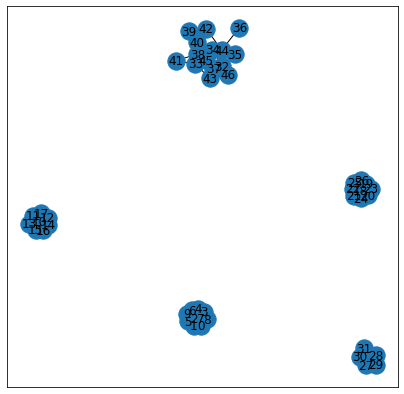

In [10]:
%matplotlib inline
from utils import draw, random_multiple_component_graph
G = random_multiple_component_graph(c=4)
draw(G)